In [5]:
##Import packages
import os
import anndata as ad
import scimap as sm
import importlib

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools
import umap as um

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

import hetmel as hm

In [6]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

### Set up files, directories, variables

Set and go to project directory 

In [139]:
project_dir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/"
case_number = "Case2-7"
print(case_number)
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
savedir= "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/"

Case2-7


Variables 

In [ ]:
phenotype = pd.read_csv('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/20250408_phenotyping_workflow_allcombinations.csv')
image_path="/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/Case3-7/background/Case3-7_final.ome.tif"
feature_table_path = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case2-7/Case2-7_feature-extraction.csv"

### Read in data

In [72]:
adata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case3-7/Case3-7_tumor_adata_v2.h5ad')

### Write data

In [98]:
#write adata to a file
case_number='Case3-7'
adata.write(project_dir + case_number + '/' + case_number +'_v4.h5ad')

Read in feature extraction csv and convert to anndata frame 

In [ ]:

adata = sm.pp.mcmicro_to_scimap(feature_table_path)

Loading Case3-7_feature-extraction.csv


Set marker subset variables 

In [74]:
#Marker subsets
AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','AXL','SOX9','NGFR']

In [ ]:
adata.layers["log1p_raw"] = np.log1p(adata.raw.X) #log layer

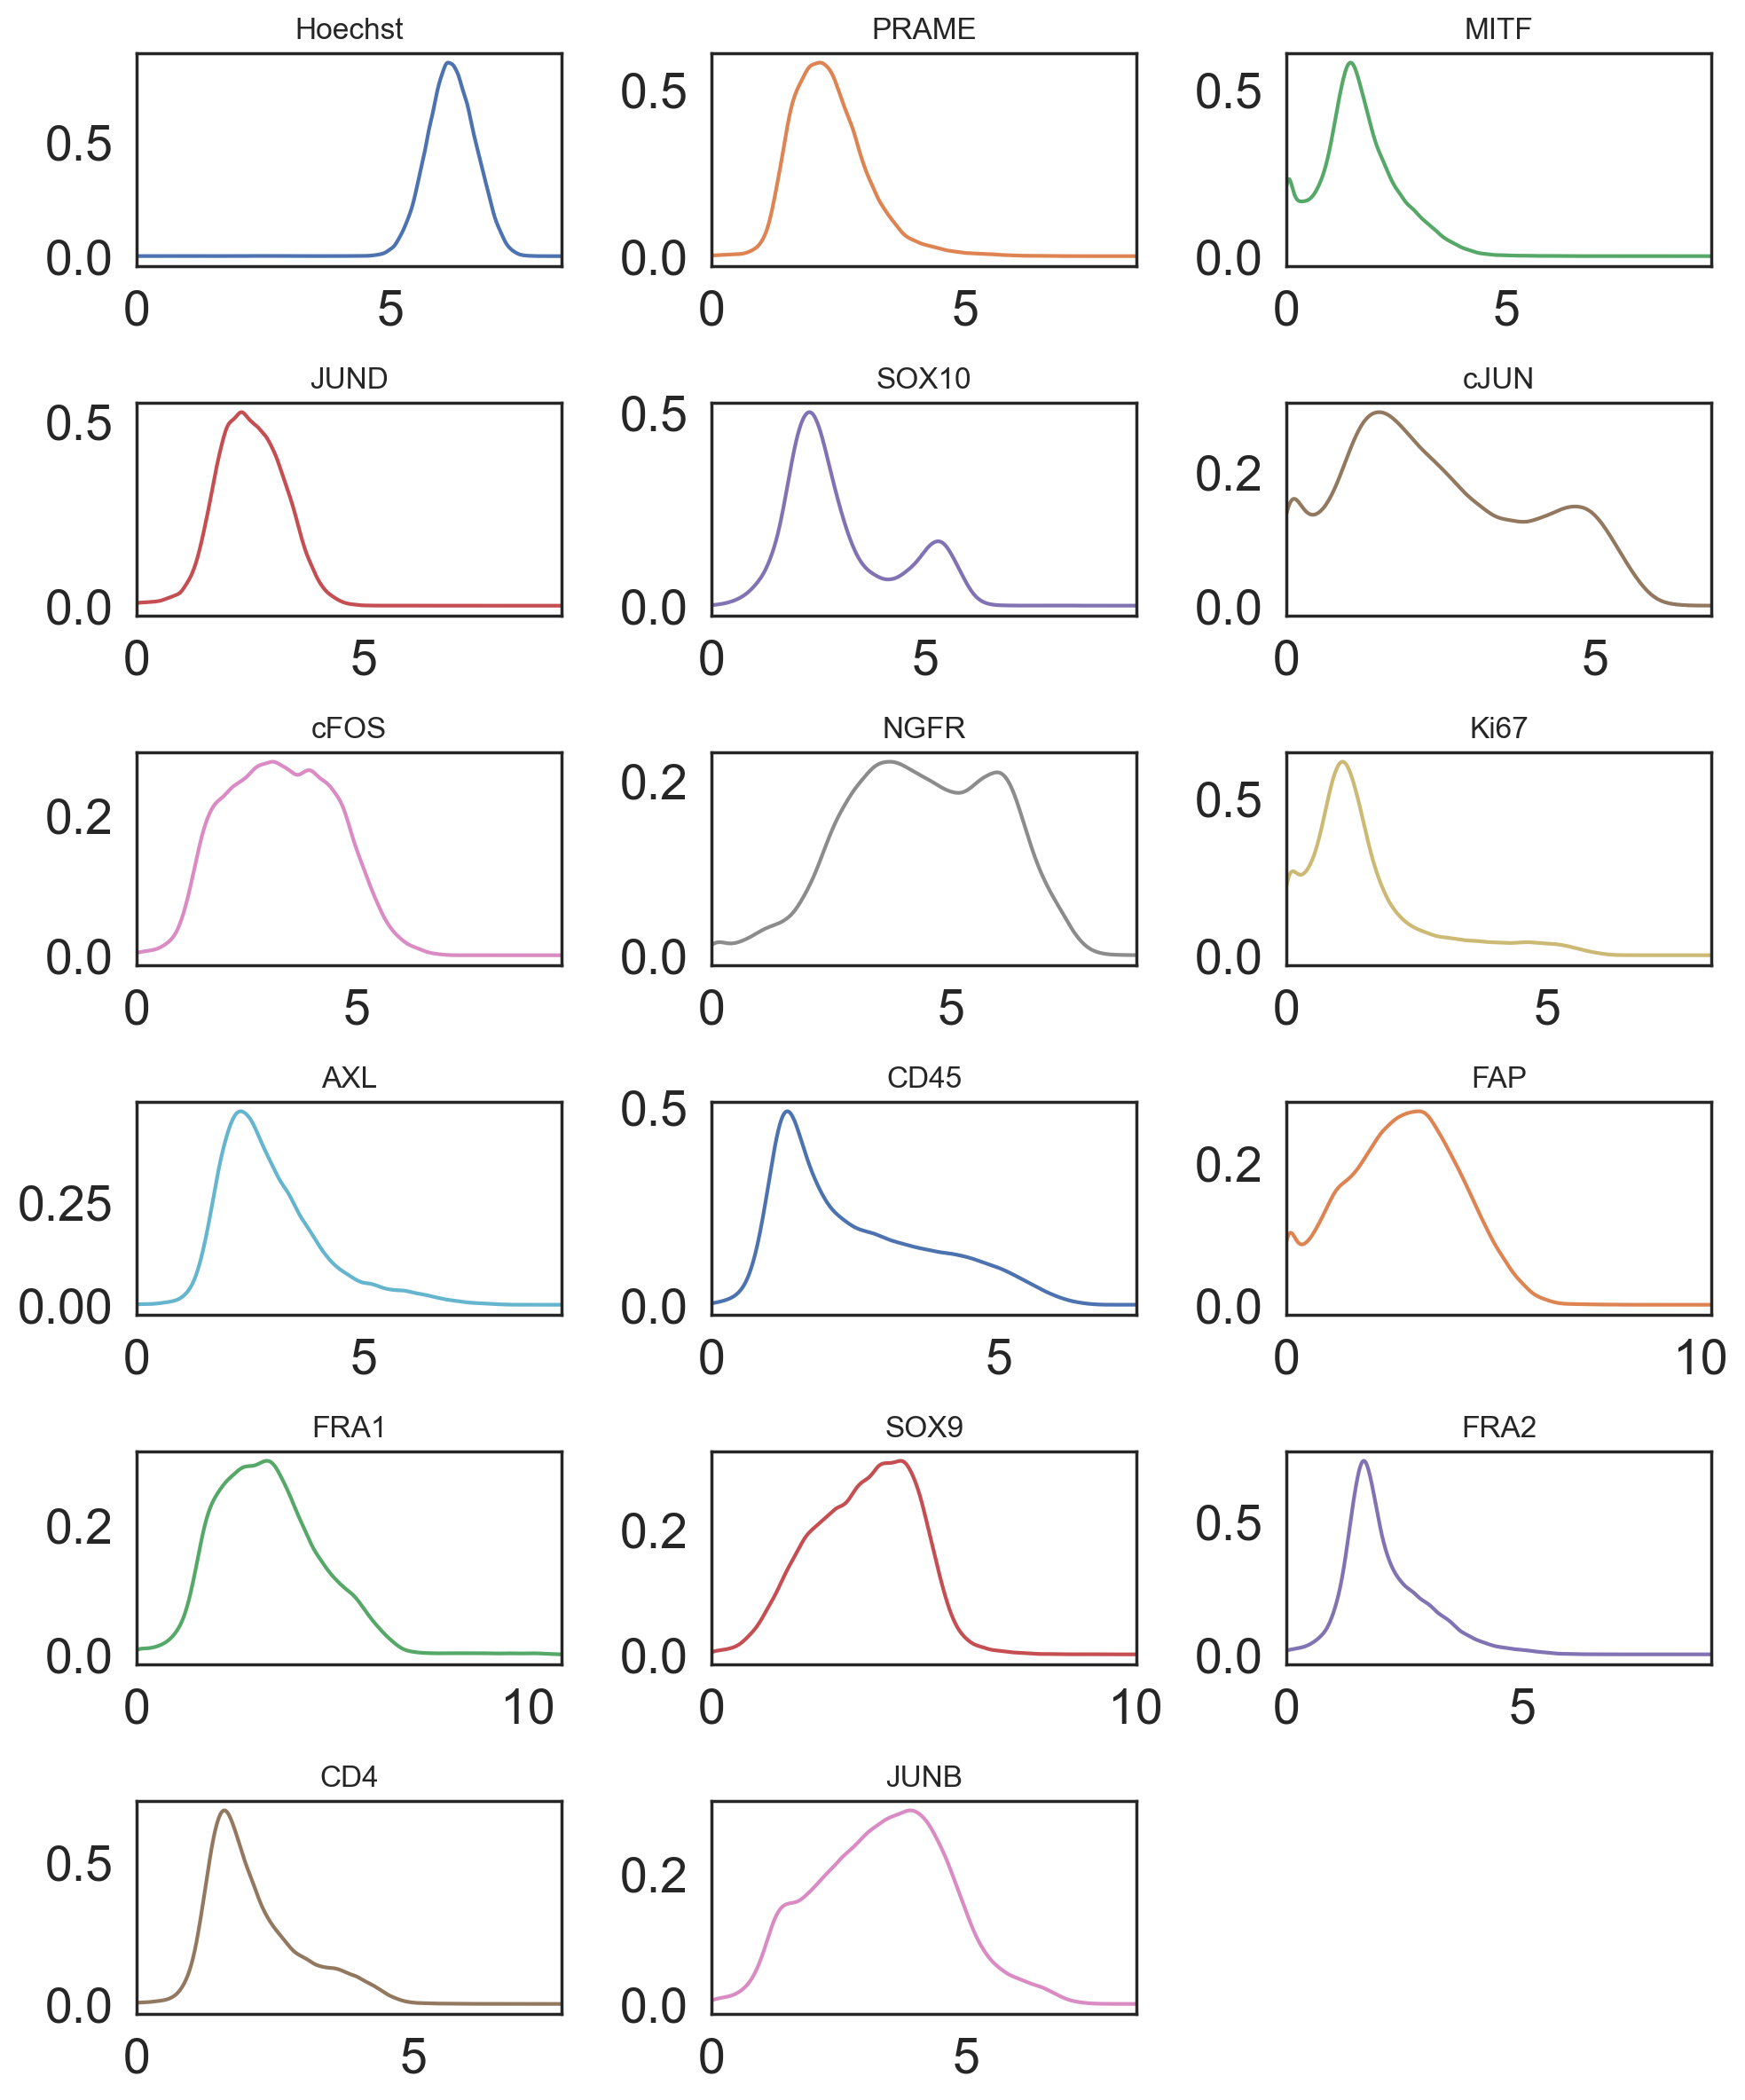

In [10]:
hm.distPlot(adata, layer='log1p_raw',figsize=(10,12),ncols=3, fontsize=20)

In [11]:
from tifffile import imread
img_data = imread(image_path)
print(img_data.shape) 

(17, 5496, 9528)


In [78]:
sm.pl.napariGater(image_path, adata, )#channel_names=['cJUN','cFOS','FRA1','FRA2','JUNB','JUND'],)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5834/290628931.py:1: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



Initializing...
Loading image data...
Calculating contrast settings...


Saved contrast settings for Case3-7_feature-extraction with 17 channels
Initialization completed in 189.62 seconds
Opening napari viewer...
Napari viewer initialized in 192.61 seconds


In [ ]:
marker_gates = pd.read_csv('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case2-7/Case2-7_markergates.csv',
    header = [0], index_col =[0])

adata.uns['gates'] = marker_gates

In [84]:
adata.uns['gates']

,Case3-7_feature-extraction
markers,
AXL,4.39
CD4,3.00
CD45,3.80
FAP,3.70
FRA1,2.60
FRA2,2.30
Hoechst,5.00
JUNB,3.30
JUND,2.90


## Phenotyping

Rescale data in adata.X according to gates.
Values greater than gate scales 0.5-1. Values lower than gate scaled to 0-0.5.

In [85]:
sm.pp.rescale(adata, gate=adata.uns['gates'])


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:145: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case3-7_feature-extraction
Scaling Hoechst (gate: 5.000)
Scaling PRAME (gate: 2.800)
Scaling MITF (gate: 2.300)
Scaling JUND (gate: 2.900)
Scaling SOX10 (gate: 2.800)
Scaling cJUN (gate: 2.100)
Scaling cFOS (gate: 2.500)
Scaling NGFR (gate: 4.600)
Scaling Ki67 (gate: 3.400)
Scaling AXL (gate: 4.390)
Scaling CD45 (gate: 3.800)
Scaling FAP (gate: 3.700)
Scaling FRA1 (gate: 2.600)
Scaling SOX9 (gate: 4.600)
Scaling FRA2 (gate: 2.300)
Scaling CD4 (gate: 3.000)
Scaling JUNB (gate: 3.300)


AnnData object with n_obs × n_vars = 445747 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers', 'gates', 'napariGaterProvenance', 'image_contrast_settings'
    layers: 'log', 'log1p_raw'

Run phenotyping function, generating new adata.obs layer for "phenotype" based on the previously defined phenotyping workflow

In [86]:
phenotype.style.format(na_rep='')
adata= sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 


Phenotyping Tumor cell
Phenotyping Fibroblast
Phenotyping Immune Cell


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [87]:
adata.obs['phenotype'].value_counts()

phenotype
Tumor cell                              84407
Unknown                                 70151
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-    66511
Fibroblast                              59303
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-    38226
MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-    17191
Immune Cell                             13147
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-    11646
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-    10943
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-    10219
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-     9888
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     8326
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-     8161
MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-     4560
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-     4270
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-     3594
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-     2903
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+     2540
MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-     2539
MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-     1678
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-     1645
MITF+ SOX10- PRAME- NGFR

Heatmap to check marker expression.
Does tumor cell expression look like any other cell type? If not, relabel "Tumor cell" as "Unknown"

In [18]:
hm.heatmap(adata,groupBy='phenotype',layer='zscore')

KeyError: 'zscore'

In [88]:
adata = hm.replace_phenotype(adata, 'Tumor cell', 'Unknown')

In [20]:
adata

AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype'
    uns: 'all_markers', 'gates', 'napariGaterProvenance', 'image_contrast_settings'
    layers: 'log'

## Subset adata to focus analysis on tumor cells within tumor ROI

In [21]:
adata

AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype'
    uns: 'all_markers', 'gates', 'napariGaterProvenance', 'image_contrast_settings'
    layers: 'log'

In [89]:
# Apply the categorize_phenotype function to create a new column in adata.obs
# Categorizes each cell as Tumor, TME, or Other based on the phenotype
adata.obs['phenotype_category'] = adata.obs['phenotype'].apply(hm.categorize_phenotype)
# Display the updated adata.obs
adata.obs.head()

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,phenotype,phenotype_category
Case3-7_feature-extraction_1,1229.800000,4.882353,85.0,11.109378,9.747532,0.479733,0.934066,0.772727,1.550910,1,Case3-7_feature-extraction,Unknown,Other
Case3-7_feature-extraction_2,1392.013889,4.722222,72.0,13.111362,7.146800,0.838381,0.911392,0.666667,-0.473671,2,Case3-7_feature-extraction,MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+,Tumor
Case3-7_feature-extraction_3,1519.690476,1.833333,42.0,10.345980,5.374768,0.854469,0.913043,0.700000,-1.471848,3,Case3-7_feature-extraction,MITF+ SOX10- PRAME- NGFR- SOX9- AXL-,Tumor
Case3-7_feature-extraction_4,1544.500000,2.869565,46.0,7.989123,7.300206,0.406236,0.958333,0.821429,-1.570796,4,Case3-7_feature-extraction,Unknown,Other
Case3-7_feature-extraction_5,1706.392857,1.392857,28.0,8.037743,4.678086,0.813178,0.903226,0.700000,-1.499375,5,Case3-7_feature-extraction,MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-,Tumor


Add ROIs using napari. Make sure to name Shapes layer "Tumor" to enable tumor subsetting later

In [ ]:
###add ROIS
%gui qt
sm.pl.addROI_image(image_path, adata)
adata.obs['ROI'].value_counts()


        Opening Napari;
        Add shape layers (on left) to draw ROI's. 
        Rename the shape layer to give a name to your ROI
        Multiple shape layers are supported
        ROI's should not overlap
        Close Napari to save ROI's.
        
Identifying cells within selected ROI's
ROIs saved under adata.obs['ROI']


ROI
Tumor    18736
Other    11259
Name: count, dtype: int64

In [ ]:
#Function to replace values in the 'ROI' column in case you forgot to name the shape layer
#adata.obs['ROI'] = adata.obs['ROI'].replace("Shapes", "Tumor")
adata.obs['ROI'].value_counts()

ROI
Other          36354
Tumor_right    30016
Tumor_left     22661
Name: count, dtype: int64

OR copy ROIs from a previous adata file

In [51]:
adata.obs['ROI'] = bdata.obs['ROI'].values

In [47]:
bdata.obs['ROI'].value_counts()

ROI
Other          36354
Tumor_right    30016
Tumor_left     22661
Name: count, dtype: int64

In [92]:
bdata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case3-7/Case3-7_v2.h5ad')
#write adata to a file
adata.obs['ROI'] = bdata.obs['ROI']

In [93]:
print(adata.obs['ROI'].value_counts())

ROI
Tumor_Nodule1    141168
Tumor_Nodule2     65018
Name: count, dtype: int64


In [43]:
print((adata.obs['phenotype_category'] == 'Tumor').sum())
print(adata.obs['ROI'].str.contains('Tumor', na=False, case=False).sum())

23415
0


Create new tumor.adata object with only tumor cells

In [94]:
#subset adata for cells with Tumor phenotype and Tumor ROI
tumor_adata = adata[(adata.obs['phenotype_category'] == 'Tumor') & (adata.obs['ROI'].str.contains('Tumor', na=False, case=False))]
tumor_adata.obs['ROI'].value_counts()
#tumor_adata.write(project_dir + '/' + case_number +'/' + str(case_number) + "_tumor_adata_v4.h5ad")

ROI
Tumor_Nodule1    134800
Tumor_Nodule2     62683
Name: count, dtype: int64

In [95]:
tumor_adata.obs.head()

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,phenotype,phenotype_category,ROI
Case3-7_feature-extraction_15387,1095.075949,683.177215,79.0,10.610537,9.830794,0.376264,0.975309,0.790000,0.473460,15387,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15447,1126.042254,684.380282,71.0,10.962796,8.548704,0.626038,0.972603,0.806818,-1.368492,15447,Case3-7_feature-extraction,MITF+ SOX10- PRAME- NGFR- SOX9- AXL+,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15634,1084.822785,692.949367,79.0,12.753303,7.977794,0.780186,0.951807,0.797980,-1.123238,15634,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15741,1058.915789,699.800000,95.0,14.474816,8.632859,0.802683,0.879630,0.608974,-0.529979,15741,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15764,1105.610000,700.810000,100.0,12.060420,11.013405,0.407543,0.909091,0.641026,-1.205226,15764,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Tumor,Tumor_Nodule1


Inspect tumor adata

In [99]:
tumor_adata.obs.head()


,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,phenotype,phenotype_category,ROI
Case3-7_feature-extraction_15387,1095.075949,683.177215,79.0,10.610537,9.830794,0.376264,0.975309,0.790000,0.473460,15387,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15447,1126.042254,684.380282,71.0,10.962796,8.548704,0.626038,0.972603,0.806818,-1.368492,15447,Case3-7_feature-extraction,MITF+ SOX10- PRAME- NGFR- SOX9- AXL+,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15634,1084.822785,692.949367,79.0,12.753303,7.977794,0.780186,0.951807,0.797980,-1.123238,15634,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15741,1058.915789,699.800000,95.0,14.474816,8.632859,0.802683,0.879630,0.608974,-0.529979,15741,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-,Tumor,Tumor_Nodule1
Case3-7_feature-extraction_15764,1105.610000,700.810000,100.0,12.060420,11.013405,0.407543,0.909091,0.641026,-1.205226,15764,Case3-7_feature-extraction,MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-,Tumor,Tumor_Nodule1


In [97]:
tumor_adata.obs['phenotype'].value_counts()

phenotype
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-    65156
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-    38061
MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-    17024
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-    10482
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-     9804
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-     9341
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-     8009
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     7980
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-     6877
MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-     4249
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-     3396
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-     2603
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-     2558
MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-     2521
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-     1583
MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-     1480
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-     1401
MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-     1399
MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-      478
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-      400
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-      337
MITF+ SOX10+ PRAME+ NGFR

In [ ]:
case_number

'Case4-2'

Save adata

In [133]:
#write adata to a file
#tumor_adata.write(project_dir + '/' + case_number + '/' + case_number + 'tumor_v4_AP1gated.h5ad')
tumor_adata = ad.read_h5ad('/Volumes/FallahiLab-3/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case4-2/Case4-2tumor_v5_AP1gated.h5ad')

In [135]:
tumor_adata.X

array([[0.48228838, 0.44664524, 0.38041012, ..., 0.46062735, 0.37246359,
        0.55437362],
       [0.48268859, 0.50447188, 0.38243867, ..., 0.39682857, 0.45155487,
        0.38803103],
       [0.57386062, 0.36994406, 0.53539859, ..., 0.36097844, 0.49962673,
        0.57293298],
       ...,
       [0.46545131, 0.65882721, 0.        , ..., 0.        , 0.59975094,
        0.        ],
       [0.48318912, 0.53398961, 0.        , ..., 0.00518697, 0.60864474,
        0.07248081],
       [0.42887959, 0.5395165 , 0.14747602, ..., 0.41367594, 0.42883068,
        0.20053942]])

In [62]:
adata.X

array([[0.49458407, 0.28971094, 0.63503992, ..., 0.64322392, 0.20795284,
        0.78802985],
       [0.41355494, 0.23862542, 0.35504824, ..., 0.40400784, 0.25845301,
        0.48049359],
       [0.46041023, 0.24115245, 0.52902095, ..., 0.5794037 , 0.19753971,
        0.7691375 ],
       ...,
       [0.49049073, 0.34989935, 0.        , ..., 0.04782787, 0.30821399,
        0.01838807],
       [0.57339967, 0.52360196, 0.        , ..., 0.09130284, 0.16646658,
        0.10118658],
       [0.4718858 , 0.43378034, 0.02983225, ..., 0.18317642, 0.27718788,
        0.12133036]])

## Add columns to anndata to identify marker positivity of diff state and ap1 markers on a binary

In [136]:
# Define your marker lists
Diff_state_markers = ['MITF','SOX10','PRAME','AXL','SOX9','NGFR']
AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']

# Combine all markers
all_markers = Diff_state_markers + AP1s

# Loop through each marker and assign positivity column
for marker in all_markers:
    if marker in tumor_adata.var_names:
        idx = tumor_adata.var_names.get_loc(marker)
        positive = tumor_adata.X[:, idx] >= 0.5
        tumor_adata.obs[f'{marker}_positivity'] = np.where(positive, 'positive', 'negative')
    else:
        print(f"Marker {marker} not found in tumor_adata.var_names")

In [137]:
tumor_adata.obs['MITF_positivity'].value_counts()

MITF_positivity
negative    15249
positive      549
Name: count, dtype: int64

In [138]:

tumor_adata.obs['phenotype'].value_counts()

phenotype
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-    7836
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-    2775
MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-    1578
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+     795
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+     400
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-     347
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-     326
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     188
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-     169
MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+     157
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-     148
MITF- SOX10- PRAME+ NGFR- SOX9- AXL+     118
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-     115
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-     105
MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-      94
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-      65
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+      59
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-      54
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+      50
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+      40
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-      38
MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-      32


In [122]:

tumor_adata = ad.read_h5ad("/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case3-7/Case3-7tumor_v4_AP1gated.h5ad")

In [124]:
# List of all positivity columns
positivity_cols = [f"{marker}_positivity" for marker in Diff_state_markers + AP1s]

# Prepare data: count positive/negative for each marker
plot_data = pd.DataFrame([
    tumor_adata.obs[col].value_counts(normalize=True) * 100 for col in positivity_cols
], index=positivity_cols).fillna(0)

# Reformat for plotting
plot_data = plot_data[['positive', 'negative']]  # Ensure order

# Plot with custom font size and figure size
ax = plot_data.plot(
    kind='bar',
    stacked=True,
    color=['#4daf4a', '#e41a1c'],
    figsize=(9, 5)  # Adjust plot size here
)
plt.ylabel('Percentage of tumor cells', fontsize=20)
plt.xlabel('Marker', fontsize=20)
plt.title('Cell state marker expression of tumor cells', fontsize=20)
plt.xticks(
    ticks=range(len(positivity_cols)),
    labels=[col.replace('_positivity','') for col in positivity_cols],
    rotation=45,
    fontsize=18
)
plt.yticks(fontsize=18)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

KeyError: 'MITF_positivity'

In [126]:
print(tumor_adata.obs.columns)

Index(['X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation',
       'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI',
       'MITF_positivity', 'SOX10_positivity', 'PRAME_positivity',
       'AXL_positivity', 'SOX9_positivity', 'NGFR_positivity',
       'cFOS_positivity', 'FRA1_positivity', 'FRA2_positivity',
       'cJUN_positivity', 'JUNB_positivity', 'JUND_positivity'],
      dtype='object')


In [127]:
# Define marker order
marker_order = ['MITF','SOX10','PRAME','AXL','SOX9','NGFR','cFOS','FRA1','FRA2','cJUN','JUNB','JUND']

# Build the combined string for each cell
def combine_marker_status(row):
    return ' '.join([
        f"{marker}{'+' if row[f'{marker}_positivity']=='positive' else '-'}"
        for marker in marker_order
    ])



In [128]:
tumor_adata.obs['combined_marker_status'] = tumor_adata.obs.apply(combine_marker_status, axis=1)

In [119]:
print(tumor_adata.obs['combined_marker_status'].value_counts())

combined_marker_status
MITF- SOX10+ PRAME- AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2+ cJUN+ JUNB+ JUND+    3595
MITF- SOX10+ PRAME+ AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2+ cJUN+ JUNB+ JUND+    1631
MITF- SOX10+ PRAME- AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2- cJUN+ JUNB+ JUND+    1479
MITF- SOX10+ PRAME- AXL- SOX9+ NGFR+ cFOS+ FRA1- FRA2+ cJUN+ JUNB+ JUND+     736
MITF- SOX10+ PRAME+ AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2- cJUN+ JUNB+ JUND+     458
                                                                            ... 
MITF- SOX10- PRAME+ AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2- cJUN- JUNB+ JUND-       1
MITF- SOX10- PRAME+ AXL- SOX9- NGFR- cFOS- FRA1- FRA2+ cJUN- JUNB- JUND+       1
MITF- SOX10+ PRAME- AXL+ SOX9- NGFR- cFOS- FRA1- FRA2+ cJUN- JUNB+ JUND+       1
MITF- SOX10+ PRAME- AXL+ SOX9+ NGFR+ cFOS+ FRA1- FRA2- cJUN+ JUNB+ JUND-       1
MITF- SOX10+ PRAME+ AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2+ cJUN+ JUNB- JUND-       1
Name: count, Length: 710, dtype: int64


In [129]:
print(tumor_adata.obs['combined_marker_status'].value_counts().head(20))

combined_marker_status
MITF+ SOX10+ PRAME+ AXL- SOX9+ NGFR- cFOS+ FRA1+ FRA2+ cJUN+ JUNB+ JUND+    20485
MITF+ SOX10+ PRAME+ AXL- SOX9- NGFR- cFOS- FRA1+ FRA2- cJUN- JUNB- JUND-    12312
MITF+ SOX10+ PRAME+ AXL- SOX9- NGFR- cFOS+ FRA1+ FRA2+ cJUN+ JUNB+ JUND+    10353
MITF- SOX10+ PRAME- AXL- SOX9- NGFR- cFOS- FRA1- FRA2- cJUN- JUNB- JUND-     4407
MITF+ SOX10+ PRAME+ AXL- SOX9+ NGFR+ cFOS+ FRA1+ FRA2+ cJUN+ JUNB+ JUND+     4220
MITF+ SOX10+ PRAME+ AXL- SOX9- NGFR- cFOS- FRA1- FRA2- cJUN- JUNB- JUND-     4102
MITF+ SOX10+ PRAME+ AXL- SOX9- NGFR- cFOS+ FRA1+ FRA2+ cJUN- JUNB+ JUND+     4057
MITF+ SOX10+ PRAME+ AXL- SOX9- NGFR- cFOS+ FRA1+ FRA2- cJUN- JUNB+ JUND-     3528
MITF+ SOX10- PRAME- AXL- SOX9- NGFR- cFOS- FRA1- FRA2- cJUN- JUNB- JUND-     3327
MITF+ SOX10- PRAME+ AXL- SOX9- NGFR- cFOS- FRA1- FRA2- cJUN- JUNB- JUND-     3071
MITF+ SOX10- PRAME+ AXL- SOX9- NGFR- cFOS- FRA1+ FRA2- cJUN- JUNB- JUND-     2951
MITF+ SOX10+ PRAME+ AXL- SOX9+ NGFR- cFOS+ FRA1+ FRA2+ cJUN- JUNB+ JUND+   